In [ ]:
import keras
from keras import layers


In [ ]:
# Encoder
input_img = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

In [ ]:
# Decoder
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [ ]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584   

In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [ ]:
# Test dataset
import random as r
k=20
data=np.zeros((k,28,28,1))
for i in range(k):
    data[i,:,:]=x_test[r.randint(0,10000),:,:]


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=20, #50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/20
469/469 [==============================] - 20s 16ms/step - loss: 0.2212 - accuracy: 0.7920 - val_loss: 0.1429 - val_accuracy: 0.8023
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1309 - accuracy: 0.8057 - val_loss: 0.1215 - val_accuracy: 0.8064
Epoch 3/20
469/469 [==============================] - 7s 14ms/step - loss: 0.1187 - accuracy: 0.8086 - val_loss: 0.1145 - val_accuracy: 0.8090
Epoch 4/20
469/469 [==============================] - 7s 15ms/step - loss: 0.1130 - accuracy: 0.8098 - val_loss: 0.1097 - val_accuracy: 0.8095
Epoch 5/20
469/469 [==============================] - 7s 15ms/step - loss: 0.1094 - accuracy: 0.8105 - val_loss: 0.1068 - val_accuracy: 0.8103
Epoch 6/20
469/469 [==============================] - 7s 15ms/step - loss: 0.1069 - accuracy: 0.8110 - val_loss: 0.1048 - val_accuracy: 0.8106
Epoch 7/20
469/469 [==============================] - 7s 15ms/step - loss: 0.1051 - accuracy: 0.8113 - val_loss: 0.1032 - val_accuracy: 0.810

In [ ]:
w=autoencoder.get_weights()[0]

In [ ]:
w[:,:,:,:]

array([[[[-0.29249373,  0.28998828,  0.1482748 ,  0.04298778,
           0.14400537, -0.22611468, -0.60687816,  0.26967925,
          -0.06899324,  0.12663606,  0.0602692 , -0.00892408,
           0.01797591,  0.30087724,  0.09281215, -0.30846244]],

        [[-0.11403231, -0.12999152,  0.12863037,  0.49421605,
           0.21284956,  0.07301638, -0.45406288,  0.23616706,
          -0.32344806, -0.117464  , -0.0271323 ,  0.14547624,
           0.00130958,  0.18648055,  0.01612644, -0.2721369 ]],

        [[-0.12240473, -0.02190754,  0.00522949,  0.03310888,
           0.3641897 ,  0.48087844, -0.12797917,  0.18039891,
          -0.21271297,  0.06204593, -0.00522211,  0.14428899,
           0.08147377,  0.0973046 , -0.04065048,  0.03809505]]],


       [[[ 0.25411183,  0.07642096,  0.11293322, -0.0127373 ,
          -0.1325993 , -0.31104758, -0.24693298,  0.13940331,
           0.07908221,  0.10905899,  0.01105538,  0.12650955,
           0.37707084,  0.06118975, -0.03907879, -0.2538021

In [ ]:
encoder = keras.Model(input_img, encoded)
encoded_img=encoder.predict(data)


In [ ]:
encoder.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 7, 7, 8)           584

In [ ]:
input=keras.layers.Input(shape=encoded_img.shape[1:])
x = autoencoder.layers[-7](input)
x = autoencoder.layers[-6](x)
x = autoencoder.layers[-5](x)
x = autoencoder.layers[-4](x)
x = autoencoder.layers[-3](x)
x = autoencoder.layers[-2](x)
decoded = autoencoder.layers[-1](x)
decoder = keras.Model(input, decoded)

In [ ]:
decoder.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 4, 4, 8)]         0         
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 4, 8)           584       
                                                                 
 up_sampling2d_3 (UpSampling  (None, 8, 8, 8)          0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 8, 8, 8)           584       
                                                                 
 up_sampling2d_4 (UpSampling  (None, 16, 16, 8)        0         
 2D)                                                             
                                                                 
 conv2d_19 (Conv2D)          (None, 14, 14, 16)        116

In [ ]:
encoded_img=encoder.predict(data)
decoded_img=decoder.predict(encoded_img)

In [ ]:
decoded_img.shape

(20, 28, 28, 1)

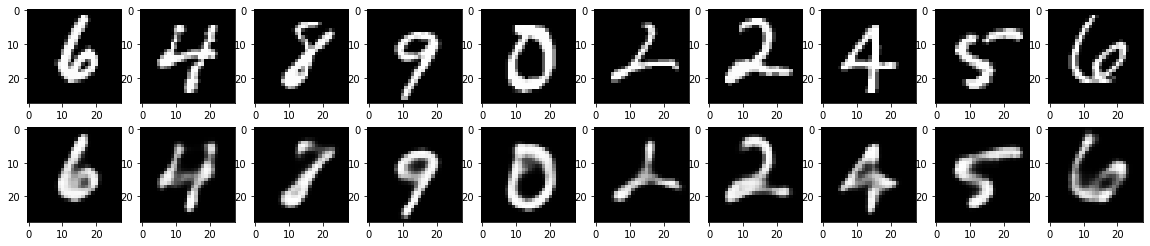

In [ ]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(data[i].reshape(28, 28))
    plt.gray()

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()

plt.show()


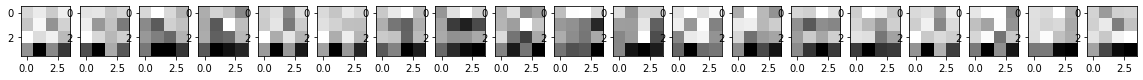

In [ ]:
n = 19
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    ax = plt.subplot(2, n, i)
    plt.imshow(encoded_img[i,:,:,1].reshape(4, 4))
    plt.gray()
plt.show()

In [ ]:
# model 2
# Encoder
input_img = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(16, (16, 16), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (8, 8), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (4, 4), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)
# Decoder
x = layers.Conv2D(64, (4, 4), activation='relu', padding='same')(encoded)
x = layers.Conv2DTranspose(64,5)(x)
x = layers.Conv2D(32, (8, 8), activation='relu', padding='same')(x)
x = layers.Conv2DTranspose(32,8)(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.Conv2DTranspose(16,16)(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [ ]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 16)        4112      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 32)        32800     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 7, 7, 64)          32832 

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=20, #50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/20
469/469 [==============================] - 20s 16ms/step - loss: 0.2159 - accuracy: 0.7988 - val_loss: 0.1370 - val_accuracy: 0.8067
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1157 - accuracy: 0.8108 - val_loss: 0.1007 - val_accuracy: 0.8119
Epoch 3/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0961 - accuracy: 0.8134 - val_loss: 0.0893 - val_accuracy: 0.8131
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0886 - accuracy: 0.8142 - val_loss: 0.0851 - val_accuracy: 0.8134
Epoch 5/20
469/469 [==============================] - 7s 14ms/step - loss: 0.0842 - accuracy: 0.8146 - val_loss: 0.0814 - val_accuracy: 0.8138
Epoch 6/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0814 - accuracy: 0.8148 - val_loss: 0.0807 - val_accuracy: 0.8140
Epoch 7/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0793 - accuracy: 0.8149 - val_loss: 0.0772 - val_accuracy: 0.814

In [ ]:
encoder = keras.Model(input_img, encoded)
encoded_imgs=encoder.predict(data)

1/1 [==============================] - 0s 168ms/step


In [ ]:
input=keras.layers.Input(shape=encoded_imgs.shape[1:])
x = autoencoder.layers[-7](input)
x = autoencoder.layers[-6](x)
x = autoencoder.layers[-5](x)
x = autoencoder.layers[-4](x)
x = autoencoder.layers[-3](x)
x = autoencoder.layers[-2](x)
decoded = autoencoder.layers[-1](x)
decoder = keras.Model(input, decoded)
decoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 4, 4, 64)]        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 4, 4, 64)          65600     
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 8, 8, 64)         102464    
 ranspose)                                                       
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 32)          131104    
                                                                 
 conv2d_transpose_4 (Conv2DT  (None, 15, 15, 32)       65568     
 ranspose)                                                       
                                                                 
 conv2d_12 (Conv2D)          (None, 13, 13, 16)        4624

1/1 [==============================] - 0s 327ms/step


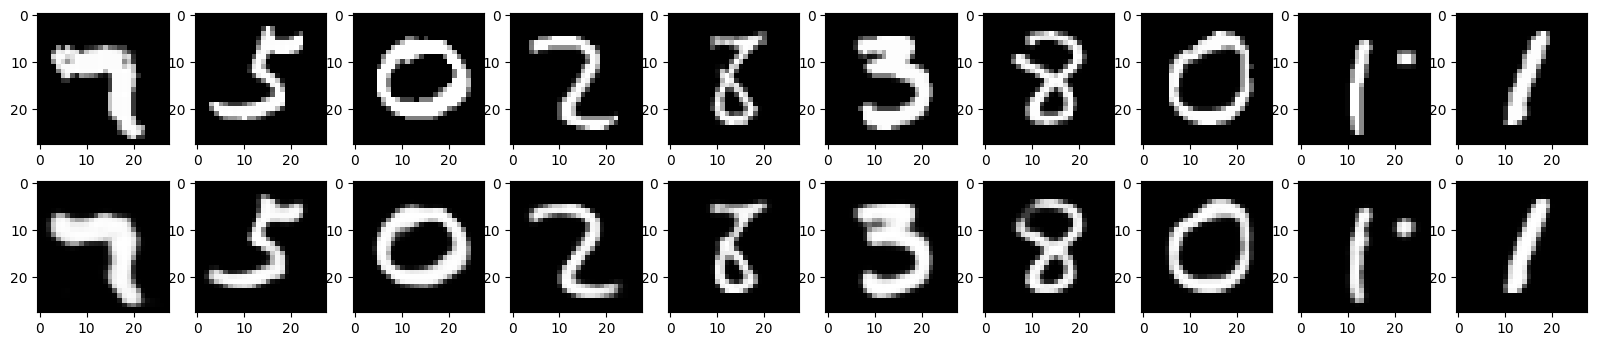

In [ ]:
encoded_img=encoder.predict(data)
decoded_img=decoder.predict(encoded_img)
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(data[i].reshape(28, 28))
    plt.gray()
    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()

plt.show()

1/1 [==============================] - 0s 21ms/step


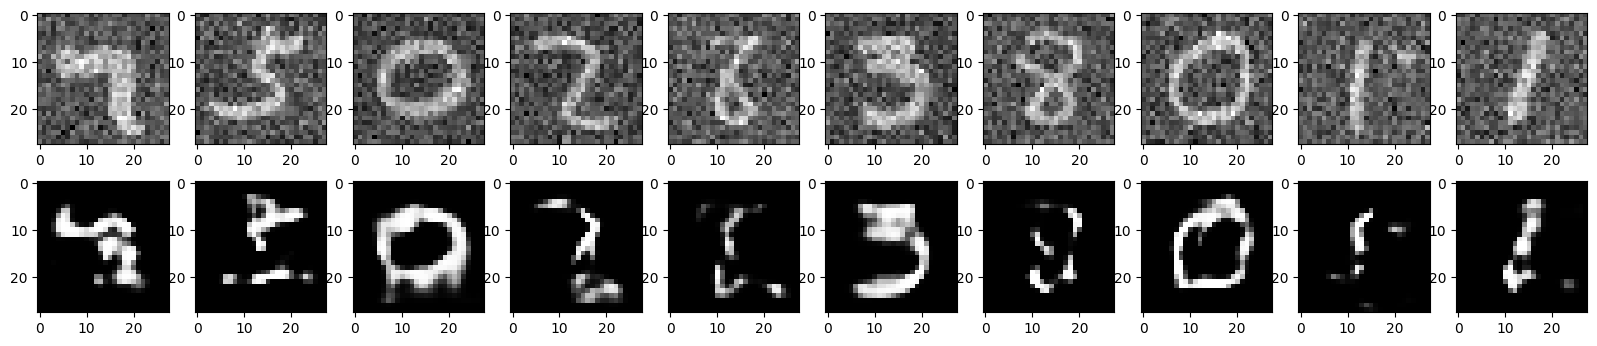

In [ ]:

import matplotlib.pyplot as plt
np.random.seed(1)
noise = np.random.normal(loc=0.0, scale=0.25, size=data.shape)
data_noise=data+noise
encoded_img=encoder.predict(data_noise)
decoded_img=decoder.predict(encoded_img)
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(data_noise[i].reshape(28, 28))
    plt.gray()
    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()

plt.show()